### 사전준비

In [30]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn으로 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 데이터 준비

패션 MNIST

In [32]:
import tensorflow as tf

tf.__version__

'2.9.1'

- 텐서플로 1.x 개발된 오픈소스나 참조할 것은 거의(!!!!) 수정을 해야함. 텐서플로 2.x 버전에서 사용가능

In [33]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(train_input, train_target), (test_input, test_target) = load_data()

In [34]:
# 훈련, 데스트 데이터셋 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [35]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

#### 패션 MNIST 훈련세트 입력 확인

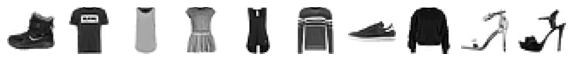

In [36]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [37]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [38]:
# 티셔츠 1 바지 2 스웨터 3 드레스 4 코트 5 샌달 6 셔츠 7 스니커즈 8 가방 9 앵클부츠

#### MNIST 데이터 갯수

In [39]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [40]:
np.unique(test_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

##### 0~255 수를 0~1 사이의 값으로 정규화

In [41]:
train_scared = train_input / 255.0
train_scared 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [42]:
train_scared.shape

(60000, 28, 28)

In [43]:
# 2차원 이미지 값을 1차원 배열 값으로 변경
train_scared = train_scared.reshape(-1, 28*28)

In [44]:
train_scared.shape

(60000, 784)

#### 확률적 경사하강법
SGDClassifier

In [45]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, X=train_scared, y=train_target, n_jobs=-1) # n_jobs CPU 코어수
scores['test_score']

array([0.82908333, 0.81941667, 0.82075   , 0.80916667, 0.818     ])

In [46]:
np.mean(scores['test_score'])

0.8192833333333333

#### 인공신경망으로 훈련

In [47]:
from sklearn.model_selection import train_test_split

train_scared, test_scared, train_target, test_target = train_test_split(train_scared, train_target, test_size=0.2, random_state=42)

In [48]:
print(train_scared.shape, train_target.shape)
print(test_scared.shape, test_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [49]:
import tensorflow.keras as keras

In [51]:
# model = keras.Sequential(keras.layers.Dense(10, input_shape=(784,)))
model = keras.Sequential()

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model.add(dense)

#### 모델 실행 (컴파일)

In [52]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#### 모델훈련

In [53]:
model.fit(train_scared, train_target, epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6050 - accuracy: 0.7980
Epoch 2/10
1500/1500 [==============================] - 1s 995us/step - loss: 0.4773 - accuracy: 0.8409
Epoch 3/10
1500/1500 [==============================] - 1s 990us/step - loss: 0.4557 - accuracy: 0.8478
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4424 - accuracy: 0.8531
Epoch 5/10
1500/1500 [==============================] - 1s 954us/step - loss: 0.4350 - accuracy: 0.8546
Epoch 6/10
1500/1500 [==============================] - 1s 938us/step - loss: 0.4305 - accuracy: 0.8580
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4271 - accuracy: 0.8587
Epoch 8/10
1500/1500 [==============================] - 1s 933us/step - loss: 0.4245 - accuracy: 0.8609
Epoch 9/10
1500/1500 [==============================] - 1s 967us/step - loss: 0.4219 - accuracy: 0.8617
Epoch 10/10
1500/1500 [==============================] - 1s 972us/step

In [54]:
model.evaluate(test_scared, test_target)

375/375 [==============================] - 0s 894us/step - loss: 0.4449 - accuracy: 0.8528


[0.4449405074119568, 0.8528333306312561]